# Trabajo practico N° 9

## Enunciado

Fecha de entrega: **27/06/2017**

Nota: la resolución de los ejercicios es **individual**; en el caso de que dos ejercicios enviados contengan un código igual o muy similar (sin considerar los comentarios), se los considerará a ambos como desaprobados. La reutilización del código de los notebooks está permitida (por ejemplo para confeccionar gráficos).

1.1 Modifique la implementación de Q-Learning realizada en el TP 8, para integrar aprendizaje basado en modelos (Dyna-Q).

1.2 Compare la convergencia de la implementación basada en $Sarsa(\lambda)$, respecto a la implementación de Dyna-Q empleando una gráfica de Steps Acumulados Promedio vs. Episodio.

## Desarrollo

1.1 Se Modifica la implementación de Q-Learning realizada en el TP 8, para integrar aprendizaje basado en modelos (Dyna-Q).

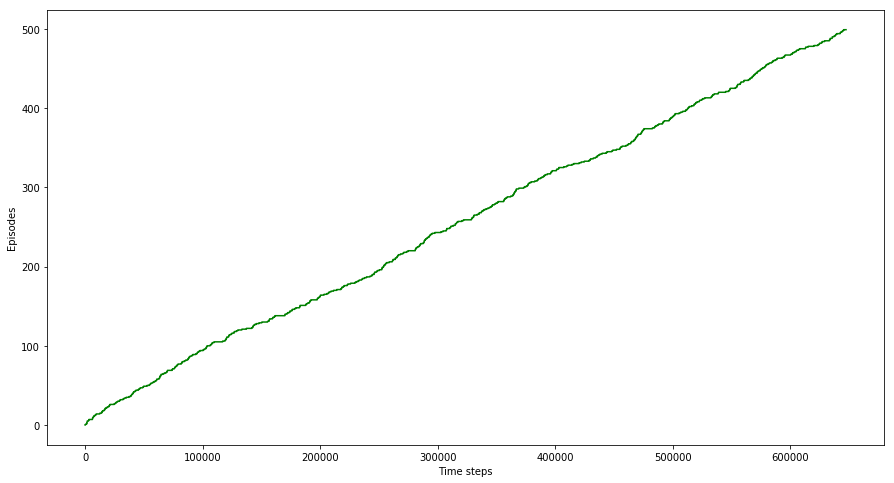

['D', 'L', 'L', 'D', 'R', 'L', 'D', 'R', 'U', 'D']
['D', 'R', 'L', 'U', 'R', 'U', 'D', 'D', 'U', 'U']
['R', 'U', 'R', 'U', 'L', 'L', 'U', 'D', 'D', 'D']
['D', 'L', 'D', 'D', 'R', 'U', 'U', 'G', 'U', 'D']
['L', 'L', 'D', 'D', 'D', 'R', 'D', 'R', 'R', 'R']
['R', 'L', 'U', 'R', 'D', 'R', 'D', 'D', 'L', 'L']
['L', 'U', 'U', 'R', 'U', 'D', 'R', 'D', 'D', 'R']
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']


In [1]:
from __future__ import print_function
import numpy as np
from python_utils.import_ import import_global
import matplotlib.pyplot as plt
import random

# tamaño del entorno (Alto)
WORLD_HEIGHT = 7

# tamaño del entorno (Ancho)
WORLD_WIDTH = 10

# Fuerza del viento para cada columna
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# Acciones posibles
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

# probabilidad de exploración
EPSILON = 0.1

# Learning rate
ALPHA = 0.5

# reward
REWARD = -1.0

n = 25


# valor de los pares estado acción
stateActionValues = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
model_si = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4), dtype=int)
model_sj = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4), dtype=int)
model_r = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4), dtype=int)
startState = [3, 0]
goalState = [3, 7]
actions = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

# transiciones de estado
actionDestination = []
for i in range(0, WORLD_HEIGHT):
    actionDestination.append([])
    for j in range(0, WORLD_WIDTH):
        destination = dict()
        destination[ACTION_UP] = [max(i - 1 - WIND[j], 0), j]
        destination[ACTION_DOWN] = [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
        destination[ACTION_LEFT] = [max(i - WIND[j], 0), max(j - 1, 0)]
        destination[ACTION_RIGHT] = [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
        actionDestination[-1].append(destination)

# interacción en un episodio
def oneEpisode():
    # acumulador de steps en el episodio
    time = 0
    # estado inicial y accion inicial
    currentState = startState
    # interactuar hasta arribar al estado objetivo
    while currentState != goalState:
        
        # selección de acción basado en epsilon-greedy
        if np.random.binomial(1, EPSILON) == 1:
            currentAction = np.random.choice(actions)
        else:
            currentAction = np.argmax(stateActionValues[currentState[0], currentState[1], :])  
        newState = actionDestination[currentState[0]][currentState[1]][currentAction]
        newAction = np.argmax(stateActionValues[newState[0], newState[1], :])
        #print(newState)
        # Dyna-Q update
        stateActionValues[currentState[0], currentState[1], currentAction] += \
            ALPHA * (REWARD + stateActionValues[newState[0], newState[1], newAction] -
            stateActionValues[currentState[0], currentState[1], currentAction])
        model_si[currentState[0], currentState[1], currentAction] = int(newState[0])
        model_sj[currentState[0], currentState[1], currentAction] = int(newState[1])
        model_r[currentState[0], currentState[1], currentAction] = REWARD
        currentState = newState
        for t in range(n):
            s = [random.randint(0, WORLD_HEIGHT - 1), random.randint(0, WORLD_WIDTH - 1)]
            a = random.choice(actions)
            r = model_r[s[0], s[1], a]
            s1 = [model_si[s[0],s[1],a], model_sj[s[0], s[1], a]]        
            stateActionValues[s[0], s[1], a] += \
                     ALPHA * (r + stateActionValues[s1[0], s1[1], newAction] - \
                     stateActionValues[s[0], s[1], a])
        time += 1
    return time

# Cantidad de episodios

episodeLimit = 500
ep = 0
episodes = []
while ep < episodeLimit:
    time = oneEpisode()
    episodes.extend([ep] * time)
    ep += 1

plt.figure(figsize=(15,8))
plt.plot(episodes, color='green')
plt.xlabel('Time steps')
plt.ylabel('Episodes')
plt.show()

# Selección Greedy sobre la política...
optimalPolicy = []
for i in range(0, WORLD_HEIGHT):
    optimalPolicy.append([])
    for j in range(0, WORLD_WIDTH):
        if [i, j] == goalState:
            optimalPolicy[-1].append('G')
            continue
        bestAction = np.argmax(stateActionValues[i, j, :])
        if bestAction == ACTION_UP:
            optimalPolicy[-1].append('U')
        elif bestAction == ACTION_DOWN:
            optimalPolicy[-1].append('D')
        elif bestAction == ACTION_LEFT:
            optimalPolicy[-1].append('L')
        elif bestAction == ACTION_RIGHT:
            optimalPolicy[-1].append('R')
for row in optimalPolicy:
    print(row)
print([str(w) for w in WIND])

#### 1.2 Se compara la convergencia de la implementación basada en $Sarsa(\lambda)$, respecto a la implementación de Dyna-Q empleando una gráfica de Steps Acumulados Promedio vs. Episodio.

Primero se realiza la toma de datos para Dyna Q

In [2]:
from __future__ import print_function
import numpy as np
from python_utils.import_ import import_global
import matplotlib.pyplot as plt
import random

# tamaño del entorno (Alto)
WORLD_HEIGHT = 7

# tamaño del entorno (Ancho)
WORLD_WIDTH = 10

# Fuerza del viento para cada columna
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# Acciones posibles
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

# probabilidad de exploración
EPSILON = 0.1

# Learning rate
ALPHA = 0.5

# reward
REWARD = -1.0

n = 25
x_dyna_q = []
y_dyna_q = []

# valor de los pares estado acción
stateActionValues = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
model_si = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4), dtype=int)
model_sj = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4), dtype=int)
model_r = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4), dtype=int)
startState = [3, 0]
goalState = [3, 7]
actions = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

# transiciones de estado
actionDestination = []
for i in range(0, WORLD_HEIGHT):
    actionDestination.append([])
    for j in range(0, WORLD_WIDTH):
        destination = dict()
        destination[ACTION_UP] = [max(i - 1 - WIND[j], 0), j]
        destination[ACTION_DOWN] = [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
        destination[ACTION_LEFT] = [max(i - WIND[j], 0), max(j - 1, 0)]
        destination[ACTION_RIGHT] = [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
        actionDestination[-1].append(destination)

# interacción en un episodio
def oneEpisode():
    # acumulador de steps en el episodio
    time = 0
    # estado inicial y accion inicial
    currentState = startState
    # interactuar hasta arribar al estado objetivo
    while currentState != goalState:
        
        # selección de acción basado en epsilon-greedy
        if np.random.binomial(1, EPSILON) == 1:
            currentAction = np.random.choice(actions)
        else:
            currentAction = np.argmax(stateActionValues[currentState[0], currentState[1], :])  
        newState = actionDestination[currentState[0]][currentState[1]][currentAction]
        newAction = np.argmax(stateActionValues[newState[0], newState[1], :])
        #print(newState)
        # Dyna-Q update
        stateActionValues[currentState[0], currentState[1], currentAction] += \
            ALPHA * (REWARD + stateActionValues[newState[0], newState[1], newAction] -
            stateActionValues[currentState[0], currentState[1], currentAction])
        model_si[currentState[0], currentState[1], currentAction] = int(newState[0])
        model_sj[currentState[0], currentState[1], currentAction] = int(newState[1])
        model_r[currentState[0], currentState[1], currentAction] = REWARD
        currentState = newState
        for t in range(n):
            s = [random.randint(0, WORLD_HEIGHT - 1), random.randint(0, WORLD_WIDTH - 1)]
            a = random.choice(actions)
            r = model_r[s[0], s[1], a]
            s1 = [model_si[s[0],s[1],a], model_sj[s[0], s[1], a]]
            n_a = np.argmax(stateActionValues[s1[0], s1[1], :])
            stateActionValues[s[0], s[1], a] += \
                     ALPHA * (r + stateActionValues[s1[0], s1[1], n_a] - \
                     stateActionValues[s[0], s[1], a])
        time += 1
    return time

# Cantidad de episodios

episodeLimit = 500
ep = 0
total_times = 0
while ep < episodeLimit:
    # Acumulamos la cantidad de steps por episodio
    total_times += oneEpisode()
    # Guardamos el episodio actual en x
    x_dyna_q.append(ep)
    # Obtenemos el step acumulado promedio 
    y_dyna_q.append(total_times/(ep+1))
    ep += 1

# Selección Greedy sobre la política...
optimalPolicyDynaQ = []
for i in range(0, WORLD_HEIGHT):
    optimalPolicyDynaQ.append([])
    for j in range(0, WORLD_WIDTH):
        if [i, j] == goalState:
            optimalPolicyDynaQ[-1].append('G')
            continue
        bestAction = np.argmax(stateActionValues[i, j, :])
        if bestAction == ACTION_UP:
            optimalPolicyDynaQ[-1].append('U')
        elif bestAction == ACTION_DOWN:
            optimalPolicyDynaQ[-1].append('D')
        elif bestAction == ACTION_LEFT:
            optimalPolicyDynaQ[-1].append('L')
        elif bestAction == ACTION_RIGHT:
            optimalPolicyDynaQ[-1].append('R')


Luego se realiza la toma de datos para Sarsa Lambda

In [3]:
from __future__ import print_function
import numpy as np
from python_utils.import_ import import_global
import matplotlib.pyplot as plt

# tamaño del entorno (Alto)
WORLD_HEIGHT = 7

# tamaño del entorno (Ancho)
WORLD_WIDTH = 10

# Fuerza del viento para cada columna
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# Acciones posibles
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

# probabilidad de exploración
EPSILON = 0.1

# Learning rate
ALPHA = 0.5

# reward
REWARD = -1.0

# GAMMA
GAMMA = 0.9
# Lambda
LAMBDA = 0.9

x_sarsa_lambda = []
y_sarsa_lambda = []

# valor de los pares estado acción
stateActionValues = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
# Eligibility trace 
e = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
startState = [3, 0]
goalState = [3, 7]
actions = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

# transiciones de estado
actionDestination = []
for i in range(0, WORLD_HEIGHT):
    actionDestination.append([])
    for j in range(0, WORLD_WIDTH):
        destination = dict()
        destination[ACTION_UP] = [max(i - 1 - WIND[j], 0), j]
        destination[ACTION_DOWN] = [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
        destination[ACTION_LEFT] = [max(i - WIND[j], 0), max(j - 1, 0)]
        destination[ACTION_RIGHT] = [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
        actionDestination[-1].append(destination)

# interacción en un episodio
def oneEpisode():
    # acumulador de steps en el episodio
    time = 0

    # estado inicial
    currentState = startState
    if np.random.binomial(1, EPSILON) == 1:
        currentAction = np.random.choice(actions)
    else:
        currentAction = np.argmax(stateActionValues[currentState[0], currentState[1], :])

    # interactuar hasta arribar al estado objetivo
    while currentState != goalState:
        newState = actionDestination[currentState[0]][currentState[1]][currentAction]
        if np.random.binomial(1, EPSILON) == 1:
            newAction = np.random.choice(actions)
        else:
            newAction = np.argmax(stateActionValues[newState[0], newState[1], :])
        # Sarsa lambda update
        DELTA = REWARD + GAMMA * stateActionValues[newState[0], newState[1], newAction] - stateActionValues[currentState[0], currentState[1], currentAction]
        e[currentState[0], currentState[1], currentAction] += 1
        for i in range(0, WORLD_HEIGHT):
            for j in range(0, WORLD_WIDTH):
                for action in actions:
                    stateActionValues[i, j, action] += ALPHA * DELTA * e[i, j, action]
                    e[i ,j, action] *= LAMBDA * GAMMA
        currentState = newState
        currentAction = newAction
        time += 1
    return time

# Cantidad de episodios

episodeLimit = 500
ep = 0
total_times = 0
while ep < episodeLimit:
    # Acumulamos la cantidad de steps por episodio
    total_times += oneEpisode()
    # Guardamos el episodio actual en x
    x_sarsa_lambda.append(ep)
    # Obtenemos el step acumulado promedio 
    y_sarsa_lambda.append(total_times/(ep+1))
    ep += 1

# Selección Greedy sobre la política...
optimalPolicySarsaLambda = []
for i in range(0, WORLD_HEIGHT):
    optimalPolicySarsaLambda.append([])
    for j in range(0, WORLD_WIDTH):
        if [i, j] == goalState:
            optimalPolicySarsaLambda[-1].append('G')
            continue
        bestAction = np.argmax(stateActionValues[i, j, :])
        if bestAction == ACTION_UP:
            optimalPolicySarsaLambda[-1].append('U')
        elif bestAction == ACTION_DOWN:
            optimalPolicySarsaLambda[-1].append('D')
        elif bestAction == ACTION_LEFT:
            optimalPolicySarsaLambda[-1].append('L')
        elif bestAction == ACTION_RIGHT:
            optimalPolicySarsaLambda[-1].append('R')


Graficamos los resultados comparando la convergencia

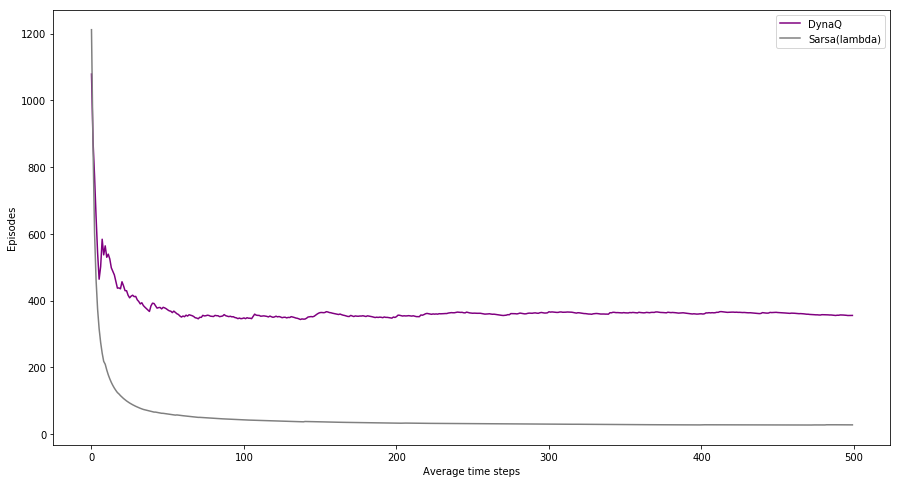

In [4]:
plt.figure(figsize=(15,8))
plt.plot(x_dyna_q, y_dyna_q, color='purple', label='DynaQ')
plt.plot(x_sarsa_lambda, y_sarsa_lambda, color='gray', label='Sarsa(lambda)')
plt.legend(loc='best')
plt.xlabel('Average time steps')
plt.ylabel('Episodes')
plt.show()

El resultado de la politica aprendida para el caso de Dyna-Q es el siguiente:

In [5]:
for row in optimalPolicyDynaQ:
    print(row)
print([str(w) for w in WIND])

['L', 'R', 'U', 'R', 'L', 'D', 'R', 'L', 'L', 'R']
['U', 'U', 'R', 'L', 'U', 'U', 'L', 'L', 'R', 'D']
['R', 'L', 'D', 'U', 'D', 'R', 'L', 'U', 'U', 'R']
['R', 'R', 'R', 'D', 'R', 'R', 'U', 'G', 'R', 'R']
['R', 'D', 'D', 'R', 'U', 'U', 'L', 'D', 'D', 'R']
['R', 'R', 'R', 'R', 'D', 'U', 'U', 'L', 'D', 'D']
['D', 'U', 'U', 'R', 'L', 'U', 'D', 'L', 'L', 'R']
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']


El resultado de la politica aprendida para el caso de Sarsa Lambda es el siguiente:

In [6]:
for row in optimalPolicySarsaLambda:
    print(row)
print([str(w) for w in WIND])

['D', 'D', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'D']
['D', 'R', 'D', 'L', 'R', 'R', 'R', 'U', 'R', 'D']
['D', 'L', 'R', 'R', 'R', 'R', 'U', 'D', 'L', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'U', 'G', 'L', 'D']
['D', 'U', 'D', 'U', 'L', 'D', 'U', 'R', 'L', 'L']
['R', 'R', 'D', 'D', 'L', 'U', 'U', 'D', 'R', 'D']
['L', 'L', 'R', 'R', 'U', 'U', 'U', 'U', 'U', 'L']
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']
